<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Import Needed Libraries</h2>
</div>

In [48]:
import os
import cv2
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf 
import keras 
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Reading Dataset And Get Info</h2>
</div>

#### Define Constraints

In [2]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
CHANNELS = 3

#### Load The Data

In [3]:
Class_Names = os.listdir('/kaggle/input/eye-diseases-classification/dataset')
Class_Names_Dict = {name:idx for idx,name in enumerate(Class_Names)}
print(Class_Names_Dict)

{'glaucoma': 0, 'normal': 1, 'diabetic_retinopathy': 2, 'cataract': 3}


In [4]:
def Load_Data():
    dataset = '/kaggle/input/eye-diseases-classification/dataset'

    Images = []
    Labels = []

    for folder in os.listdir(dataset):
        print(f"Load Images from {folder} File")
        for file in tqdm(os.listdir(os.path.join(dataset,folder))):
            image_path = os.path.join(os.path.join(dataset,folder),file)
            image = cv2.imread(image_path)
            image = cv2.resize(image , IMAGE_SIZE)
            image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

            Images.append(image)
            Labels.append(Class_Names_Dict[folder])

    
    Images = np.array(Images , dtype='float32')
    Labels = np.array(Labels , dtype='int32')

    return (Images , Labels)

Images , Labels = Load_Data()

Load Images from glaucoma File


100%|██████████| 1007/1007 [00:21<00:00, 46.26it/s]


Load Images from normal File


100%|██████████| 1074/1074 [00:14<00:00, 71.99it/s]


Load Images from diabetic_retinopathy File


100%|██████████| 1098/1098 [00:14<00:00, 74.67it/s]


Load Images from cataract File


100%|██████████| 1038/1038 [00:21<00:00, 47.28it/s]


#### Shuffle The Images

In [5]:
Images , Labels = shuffle(Images , Labels , random_state=42)    

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">EDA of Images and Get Insights</h2>
</div>

#### Number of Images

In [6]:
print(f"Number of Total Images {Images.shape[0]}")
print(f"Size of Images {IMAGE_SIZE}")

Number of Total Images 4217
Size of Images (224, 224)


In [7]:
Train_Images , dummy_Images , Train_Labels , dummy_Labels = train_test_split(Images , Labels , test_size=0.3, random_state=42, stratify=Labels)
Val_Images , Test_Images , Val_Labels , Test_Labels = train_test_split(dummy_Images , dummy_Labels , test_size=0.5, random_state=42, stratify=dummy_Labels)

In [8]:
print(f"Number of Train Images {Train_Images.shape}")
print(f"Number of Train Labels {Train_Labels.shape}")
print(f"Number of Validation Images {Val_Images.shape}")
print(f"Number of Validation Labels {Val_Labels.shape}")
print(f"Number of Test Images {Test_Images.shape}")  
print(f"Number of Test Labels {Test_Labels.shape}")  

Number of Train Images (2951, 224, 224, 3)
Number of Train Labels (2951,)
Number of Validation Images (633, 224, 224, 3)
Number of Validation Labels (633,)
Number of Test Images (633, 224, 224, 3)
Number of Test Labels (633,)


In [9]:
_ , train_counts = np.unique(Train_Labels , return_counts=True)
_ , val_counts = np.unique(Val_Labels , return_counts=True)
_ , test_counts = np.unique(Test_Labels , return_counts=True)

df = pd.DataFrame({
    'Train': train_counts,'Validation': val_counts, 'Test': test_counts
}, index=Class_Names)

df

Train  Validation  Test
glaucoma                705         151   151
normal                  752         161   161
diabetic_retinopathy    768         165   165
cataract                726         156   156

<Figure size 1000x600 with 0 Axes>

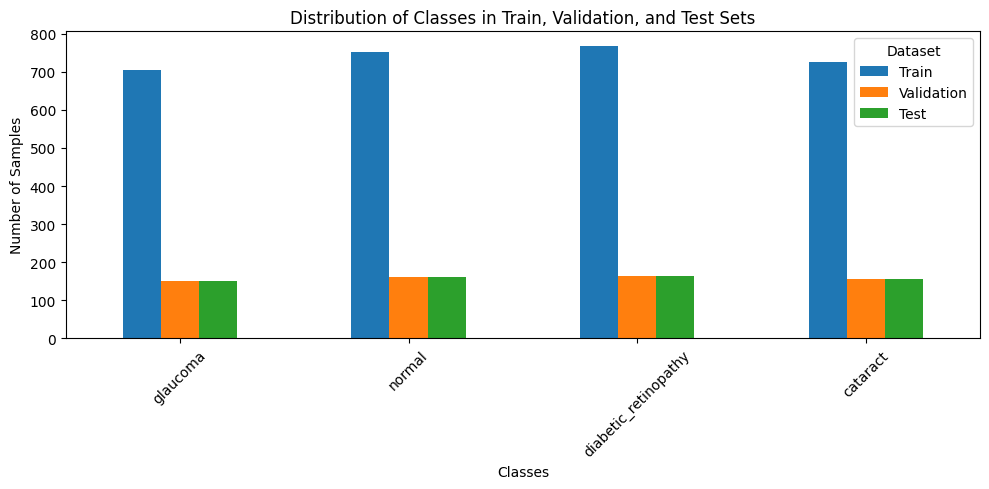

In [10]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar',figsize=(10,5))
plt.title('Distribution of Classes in Train, Validation, and Test Sets')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

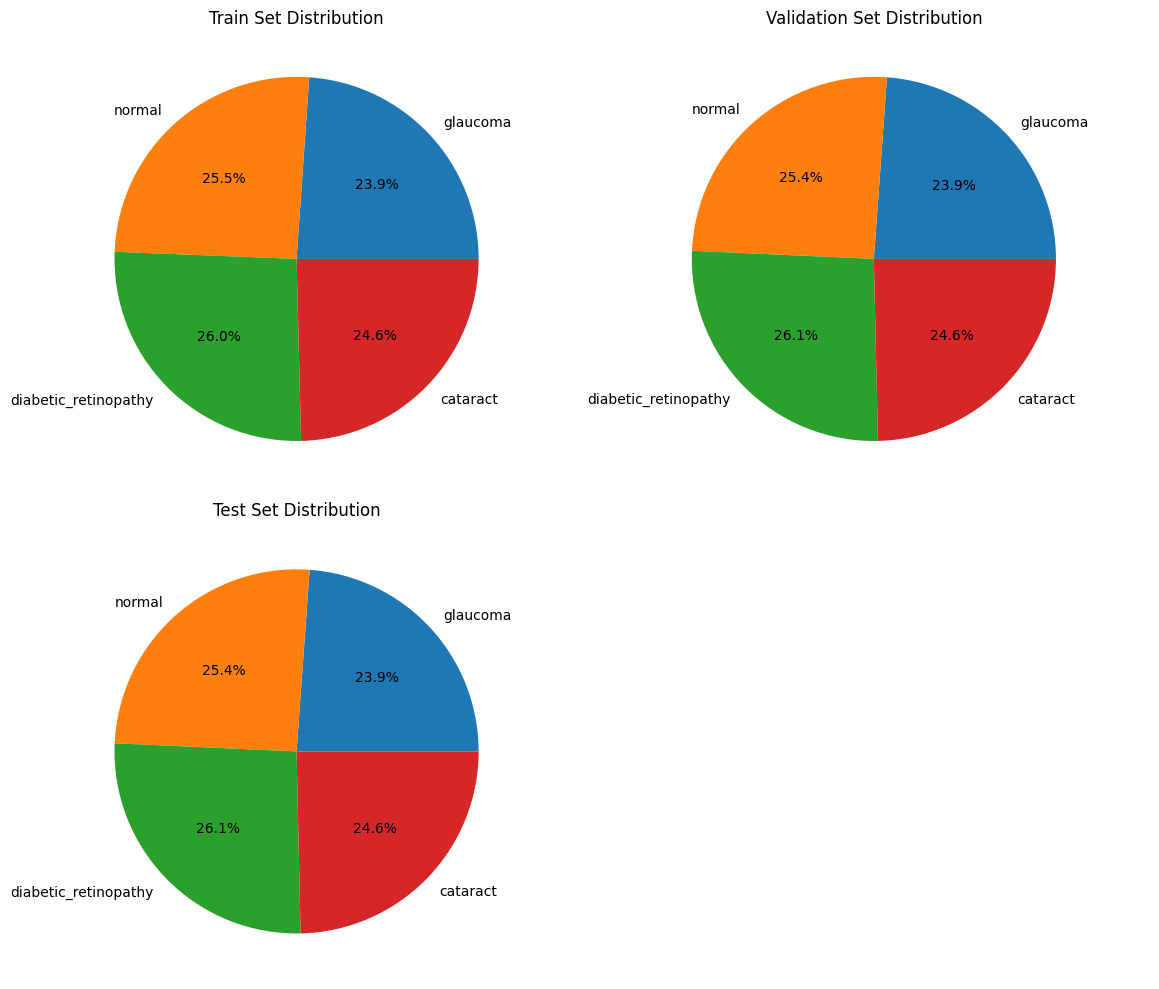

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

df.plot.pie(y='Train', autopct='%1.1f%%', title='Train Set Distribution', ax=axs[0,0], legend=False, ylabel='')
df.plot.pie(y='Validation', autopct='%1.1f%%', title='Validation Set Distribution', ax=axs[0,1], legend=False, ylabel='')
df.plot.pie(y='Test', autopct='%1.1f%%', title='Test Set Distribution', ax=axs[1,0], legend=False, ylabel='')

axs[1,1].axis('off')

plt.tight_layout()
plt.show()

#### Images In Dataset

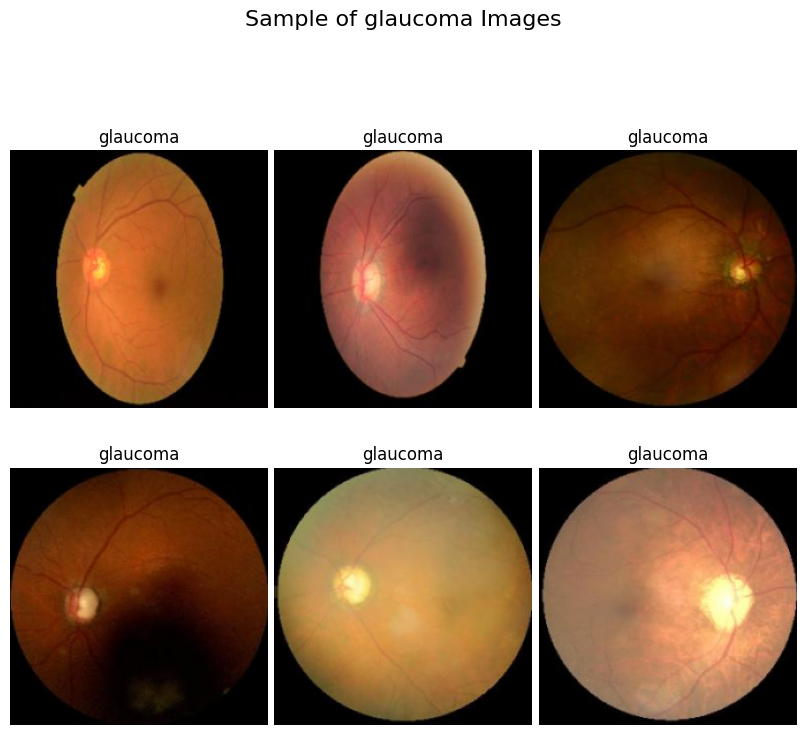

In [12]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[0]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 0)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off')  # Hide axis for cleaner look
    plt.title(f'{Class_Names[0]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88)  # Adjust top to fit the suptitle
plt.show()

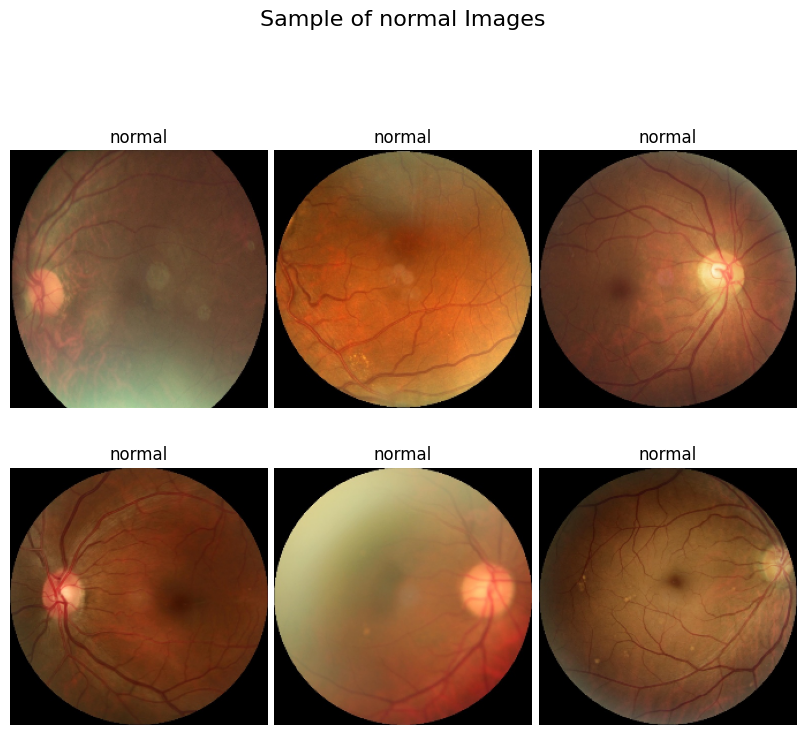

In [13]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[1]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 1)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off') 
    plt.title(f'{Class_Names[1]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

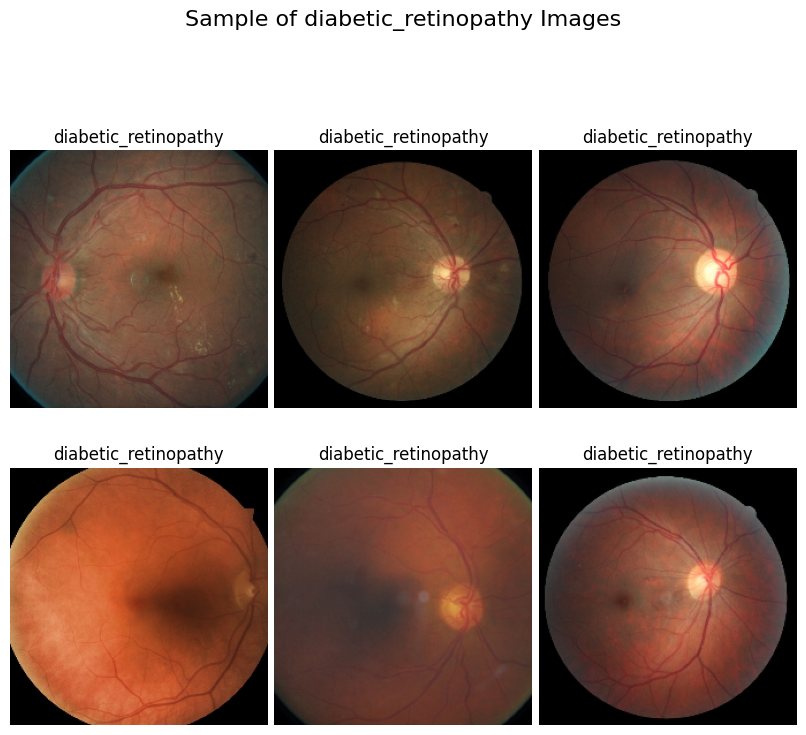

In [14]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[2]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 2)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off') 
    plt.title(f'{Class_Names[2]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

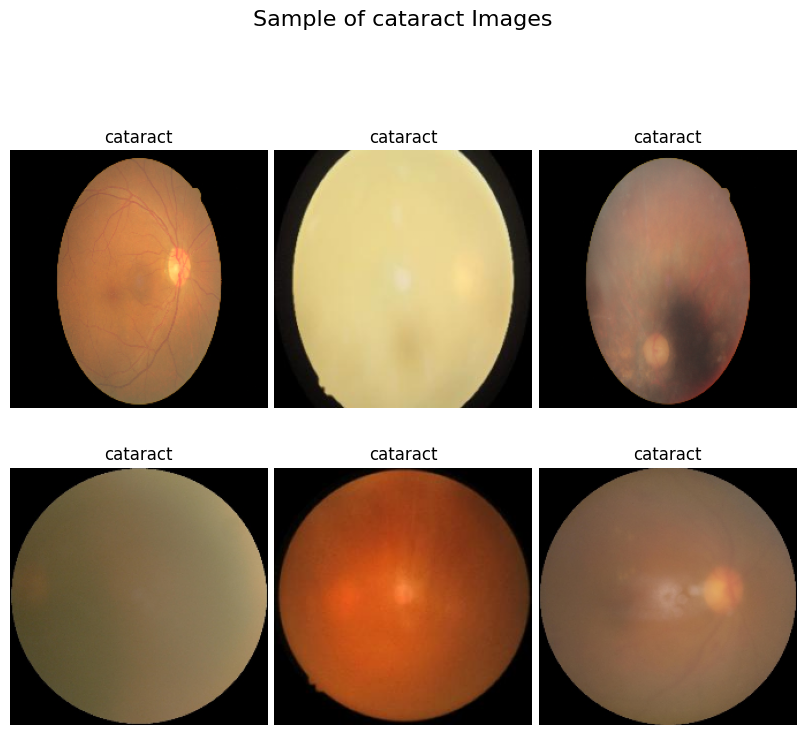

In [15]:
plt.figure(figsize=(8, 8))
plt.suptitle(f'Sample of {Class_Names[3]} Images', fontsize=16)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    Category_List = np.where(Labels == 3)[0]
    idx = np.random.choice(Category_List)
    plt.imshow(Images[idx] / 255.0)
    plt.axis('off') 
    plt.title(f'{Class_Names[3]}')

plt.tight_layout(pad=0.5)
plt.subplots_adjust(top=0.88) 
plt.show()

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Model Custom CNN</h2>
</div>

#### Build Custom CNN

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x=Train_Images,
    y=Train_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,   
)

val_generator = val_datagen.flow(x=Val_Images,
    y=Val_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_generator = test_datagen.flow(x=Test_Images,
    y=Test_Labels,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

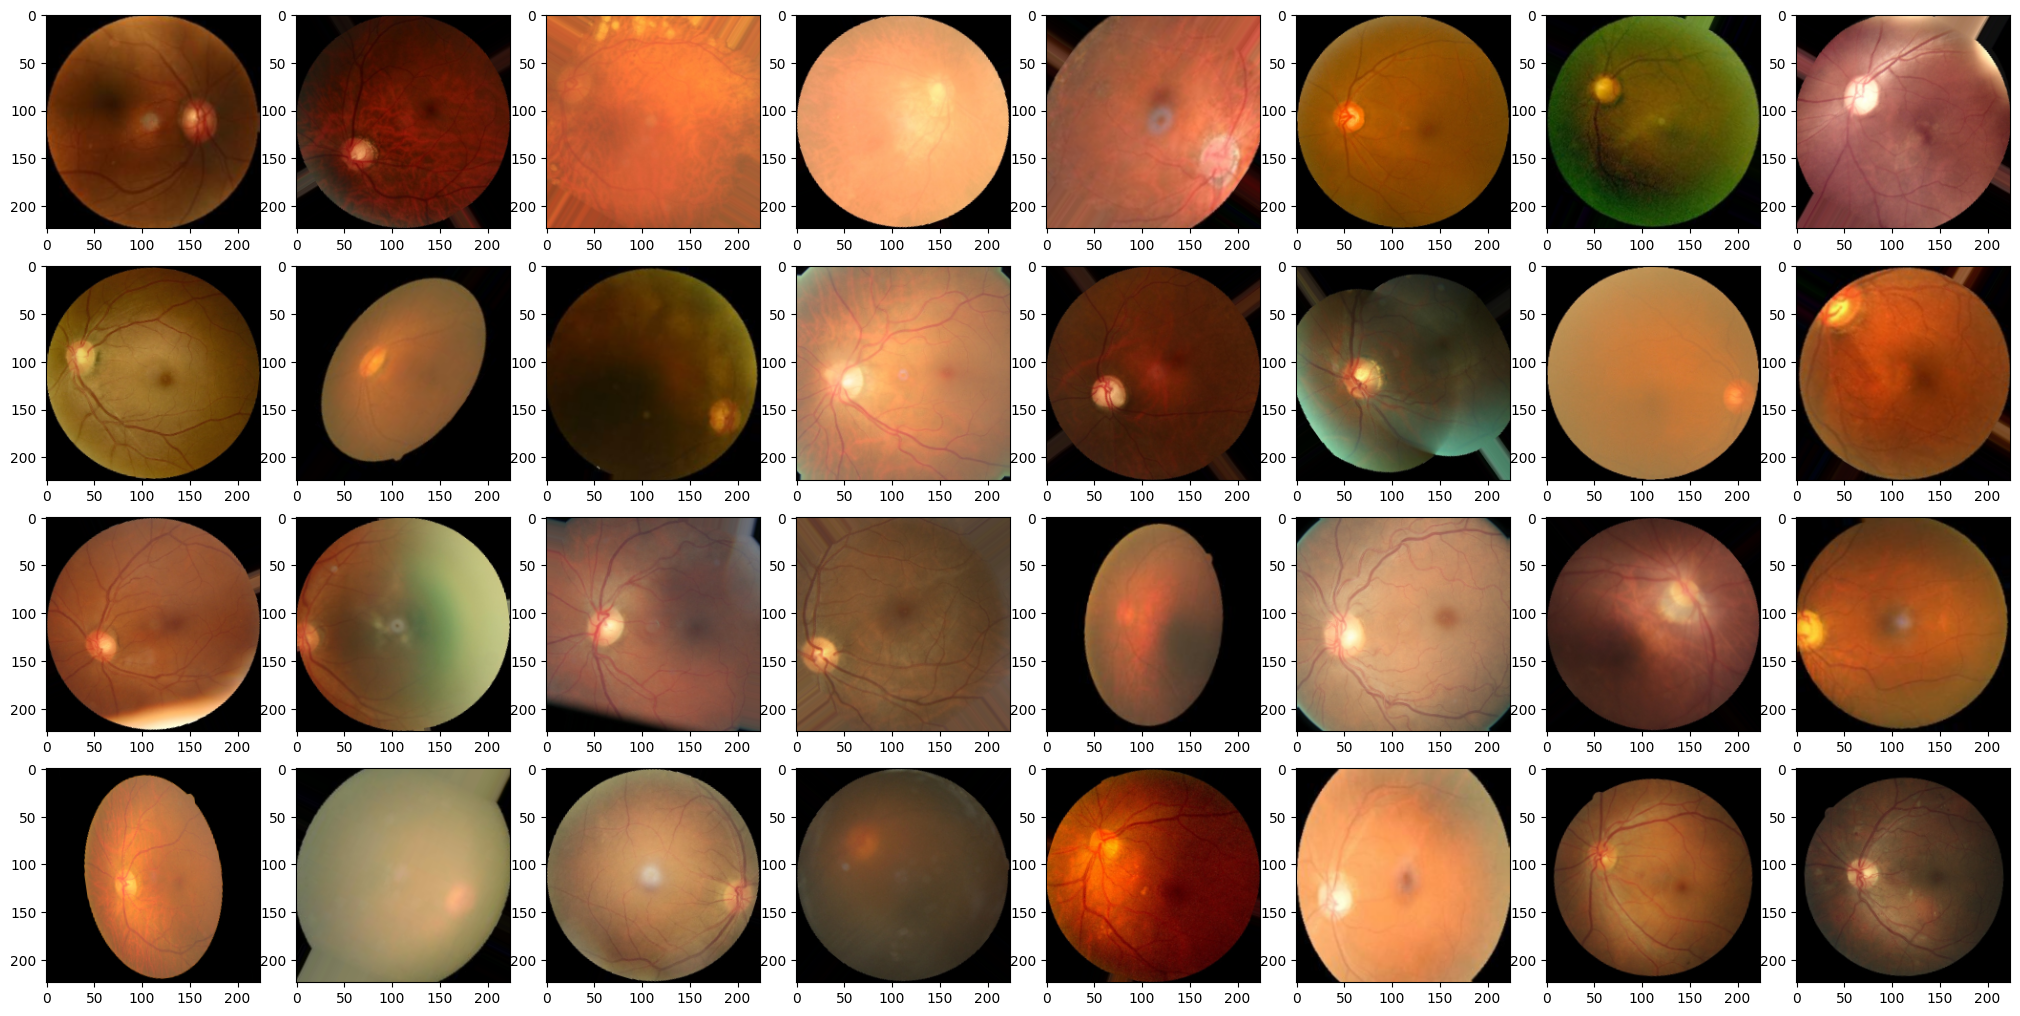

In [22]:
for x , y in train_generator:
    plt.figure(figsize=(20,20))
    for i in range(32):
        plt.subplot(8,8,i+1)
        plt.imshow(x[i])
        plt.tight_layout(pad=0 , h_pad=0 , w_pad=0)
    break

In [23]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(4, activation='softmax')
])

In [24]:
KerasModel.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
best_model_callback = keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)  
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

history = KerasModel.fit(
    train_generator,
    epochs=200,
    validation_data=val_generator,
    callbacks=[
        early_stopping_callback,
        best_model_callback,
        learning_rate_reduction
    ])

Epoch 1/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 45s 418ms/step - accuracy: 0.3495 - loss: 1.6723 - val_accuracy: 0.5719 - val_loss: 0.9435 - learning_rate: 0.0010
Epoch 2/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 36s 391ms/step - accuracy: 0.5529 - loss: 0.9352 - val_accuracy: 0.5656 - val_loss: 0.8232 - learning_rate: 0.0010
Epoch 3/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 36s 387ms/step - accuracy: 0.6118 - loss: 0.8072 - val_accuracy: 0.6003 - val_loss: 0.8195 - learning_rate: 0.0010
Epoch 4/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 37s 395ms/step - accuracy: 0.6631 - loss: 0.7492 - val_accuracy: 0.7283 - val_loss: 0.6147 - learning_rate: 0.0010
Epoch 5/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 36s 385ms/step - accuracy: 0.7466 - loss: 0.6346 - val_accuracy: 0.7646 - val_loss: 0.5601 - learning_rate: 0.0010
Epoch 6/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - accuracy: 0.7808 - loss: 0.5253 - val_accuracy: 0.7694 - val_loss: 0.5724 - learning_rate: 0.0010
Epoch 7/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 36s 382ms/step - accuracy: 0.8121 - l

#### Summary of KerasModel


In [26]:
print(KerasModel.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,035,566 (1.15 GB)

 Trainable params: 103,345,188 (394.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 206,690,378 (788.46 MB)

None


<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Evaluate Custom CNN</h2>
</div>

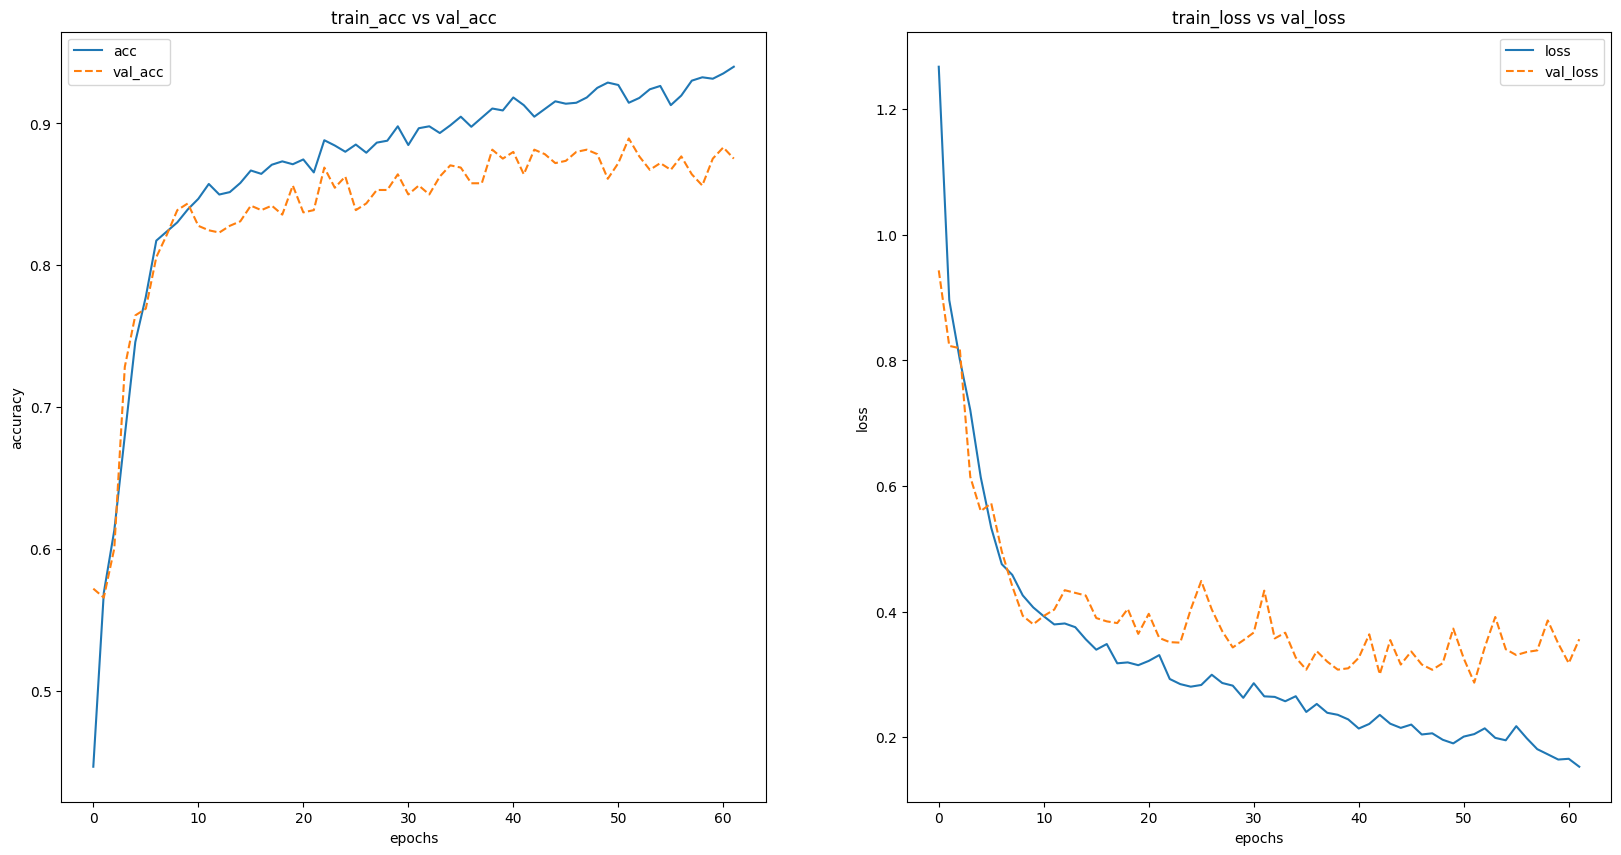

In [27]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'-', label = "acc")
    plt.plot(history.history['val_accuracy'], '--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'-', label = "loss")
    plt.plot(history.history['val_loss'], '--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history)    

In [28]:
model = keras.models.load_model('best_model.h5')
predictions = model.predict(test_generator)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step


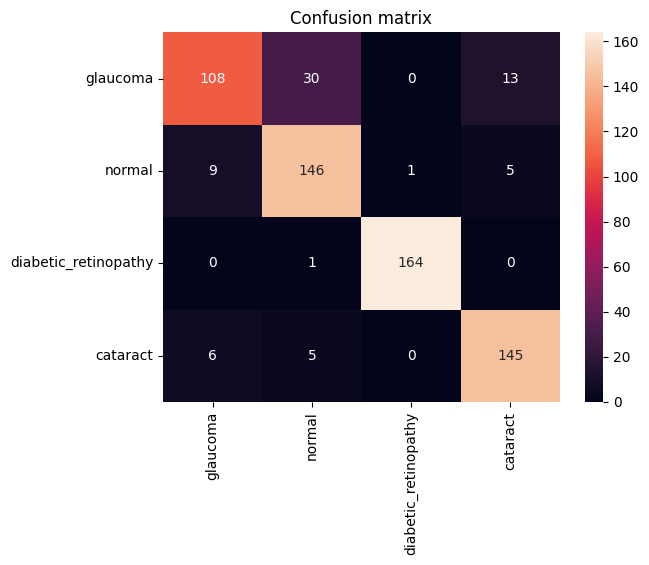

In [29]:
CM = confusion_matrix(Test_Labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels = Class_Names, 
           yticklabels = Class_Names,
           ax = ax,           
           fmt='d')
ax.set_title('Confusion matrix')
plt.show()

In [30]:
print(classification_report(Test_Labels, pred_labels,target_names = Class_Names))

                      precision    recall  f1-score   support

            glaucoma       0.88      0.72      0.79       151
              normal       0.80      0.91      0.85       161
diabetic_retinopathy       0.99      0.99      0.99       165
            cataract       0.89      0.93      0.91       156

            accuracy                           0.89       633
           macro avg       0.89      0.89      0.89       633
        weighted avg       0.89      0.89      0.89       633



<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Predicting with Custom CNN</h2>
</div>

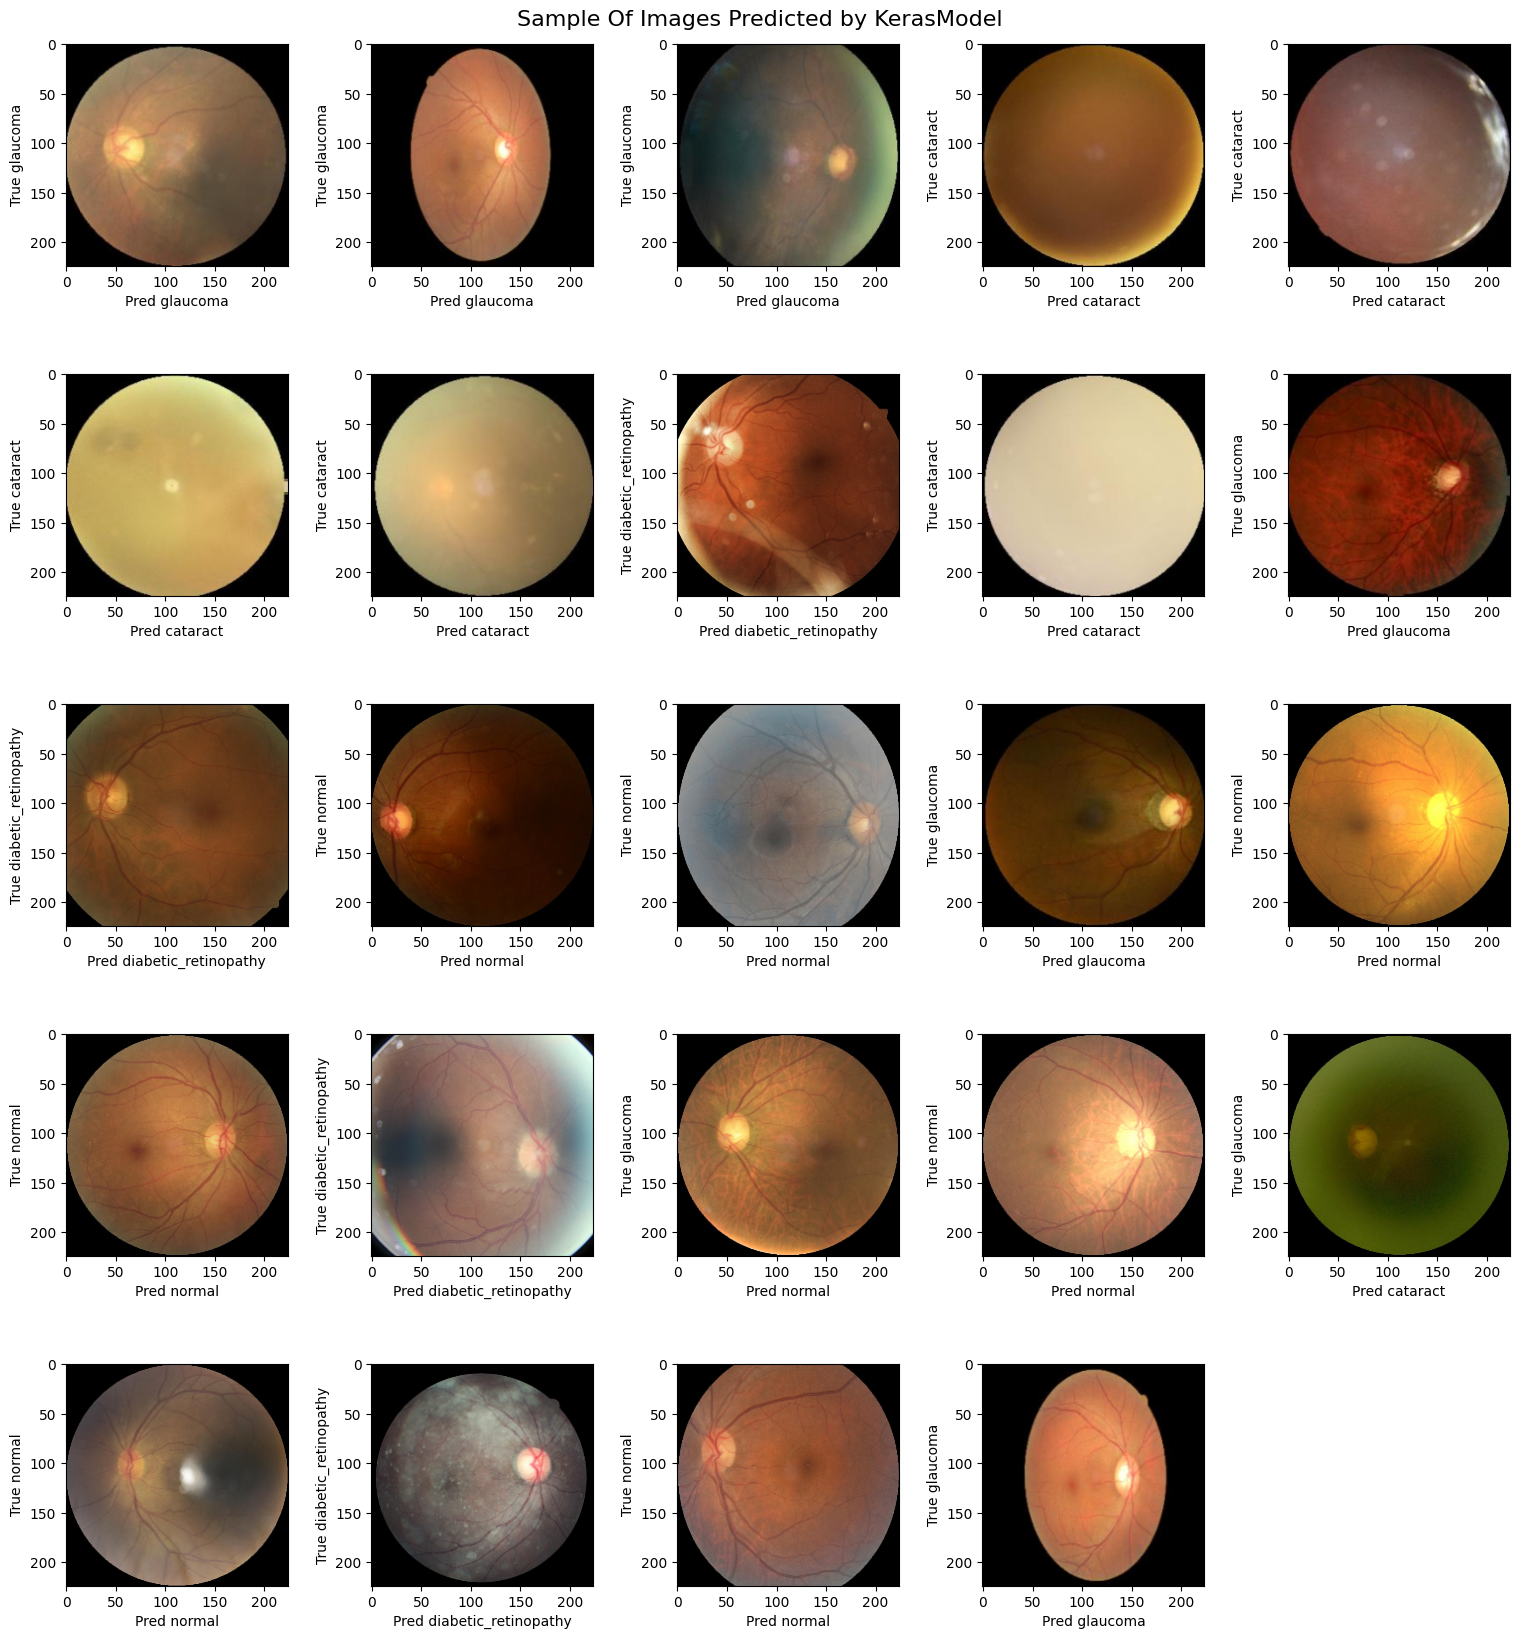

In [31]:
plt.figure(figsize=(15,20))
plt.suptitle(f"Sample Of Images Predicted by KerasModel" , fontsize=16)

for i in range(24):
    plt.subplot(6,5,i+1)
    idx = np.random.choice(np.arange(len(pred_labels)))
    plt.imshow(Test_Images[idx] / 255.0)
    plt.xlabel(f'Pred {Class_Names[pred_labels[idx]]}')
    plt.ylabel(f'True {Class_Names[Test_Labels[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=2)

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Pretrained Modeling</h2>
</div>

#### Transfer Learning

In [40]:
from tensorflow.keras.applications.efficientnet import preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   )

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

train_generator = train_datagen.flow(x=Train_Images,
    y=Train_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,   
)

val_generator = val_datagen.flow(x=Val_Images,
    y=Val_Labels,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_generator = test_datagen.flow(x=Test_Images,
    y=Test_Labels,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [41]:
from tensorflow.keras.applications import EfficientNetB7

# Load pre-trained VGG19 model (without top layers)
base_model = EfficientNetB7(weights='imagenet',
                   include_top=False,
                   input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], CHANNELS))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build custom top layers
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
outputs = keras.layers.Dense(4, activation='softmax')(x)

# Define the final model
model_EfficientNetB7 = keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model_EfficientNetB7.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

best_model_callback = keras.callbacks.ModelCheckpoint('model_EfficientNetB7.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)  

# Train the model
history_model_EfficientNetB7 = model_EfficientNetB7.fit(
   train_generator,
    epochs=200,
    validation_data=val_generator,
    callbacks=[
        early_stopping_callback,
        best_model_callback,
    ])


Epoch 1/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.6407 - loss: 0.8572 - val_accuracy: 0.6651 - val_loss: 0.7774
Epoch 2/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 39s 415ms/step - accuracy: 0.7869 - loss: 0.5314 - val_accuracy: 0.7930 - val_loss: 0.5052
Epoch 3/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 35s 378ms/step - accuracy: 0.8239 - loss: 0.4463 - val_accuracy: 0.7646 - val_loss: 0.5735
Epoch 4/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 36s 388ms/step - accuracy: 0.8475 - loss: 0.3893 - val_accuracy: 0.7883 - val_loss: 0.5055
Epoch 5/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 38s 408ms/step - accuracy: 0.8407 - loss: 0.3828 - val_accuracy: 0.8325 - val_loss: 0.4252
Epoch 6/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 38s 409ms/step - accuracy: 0.8579 - loss: 0.3697 - val_accuracy: 0.8483 - val_loss: 0.3745
Epoch 7/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 36s 386ms/step - accuracy: 0.8662 - loss: 0.3292 - val_accuracy: 0.8215 - val_loss: 0.4593
Epoch 8/200
93/93 ━━━━━━━━━━━━━━━━━━━━ 36s 389ms/step - accuracy: 0.8695 - loss: 0.3374 - va

<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Evaluate EfficientNetB7</h2>
</div>

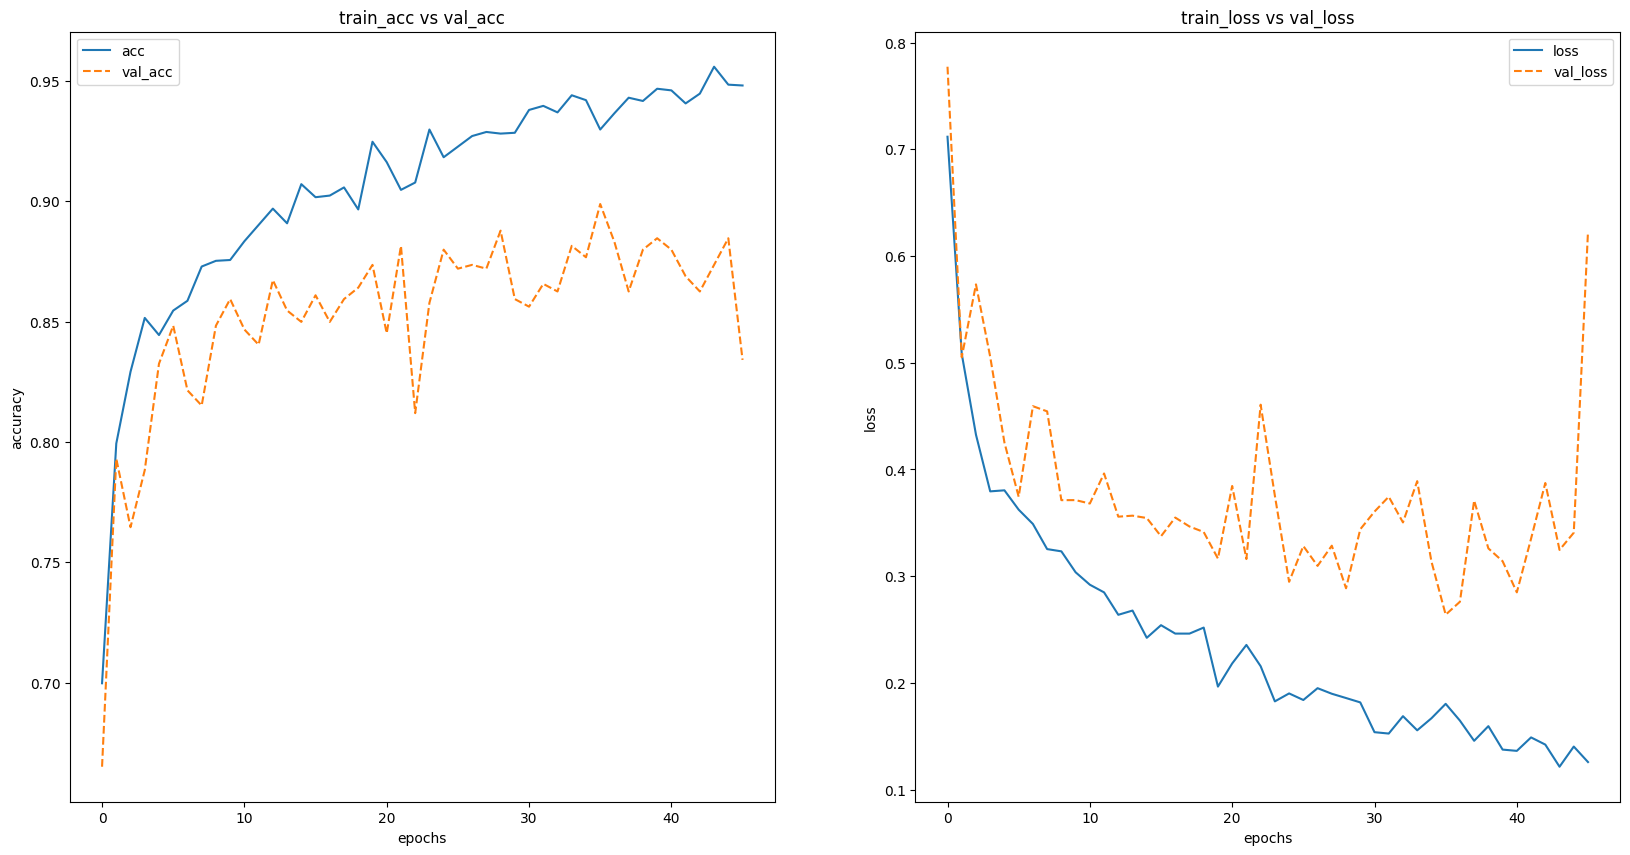

In [45]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(20,10))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'-', label = "acc")
    plt.plot(history.history['val_accuracy'], '--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'-', label = "loss")
    plt.plot(history.history['val_loss'], '--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot_accuracy_loss(history_model_EfficientNetB7)    

In [42]:
model = keras.models.load_model('/kaggle/working/model_EfficientNetB7.h5')
predictions = model.predict(test_generator)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step 


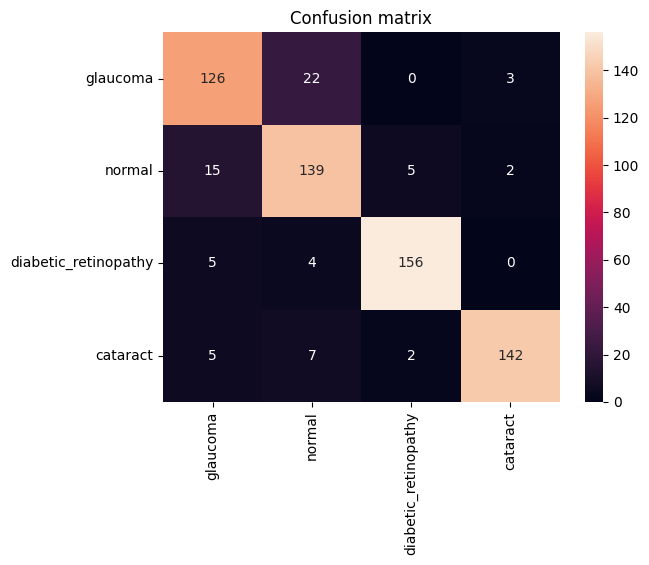

In [46]:
CM = confusion_matrix(Test_Labels, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels = Class_Names, 
           yticklabels = Class_Names,
           ax = ax,           
           fmt='d')
ax.set_title('Confusion matrix')
plt.show()

In [47]:
print(classification_report(Test_Labels, pred_labels,target_names = Class_Names))

                      precision    recall  f1-score   support

            glaucoma       0.83      0.83      0.83       151
              normal       0.81      0.86      0.83       161
diabetic_retinopathy       0.96      0.95      0.95       165
            cataract       0.97      0.91      0.94       156

            accuracy                           0.89       633
           macro avg       0.89      0.89      0.89       633
        weighted avg       0.89      0.89      0.89       633



<div style="background-color:black;
            color:white;
            transform:skew(-20deg);
            padding:30px;
            font-family:Verdana;
            letter-spacing:1px;
            margin:auto;
            width:fit-content;">
    <h2 style="transform:skew(20deg); margin:0;">Predicting with EfficientNetB7</h2>
</div>

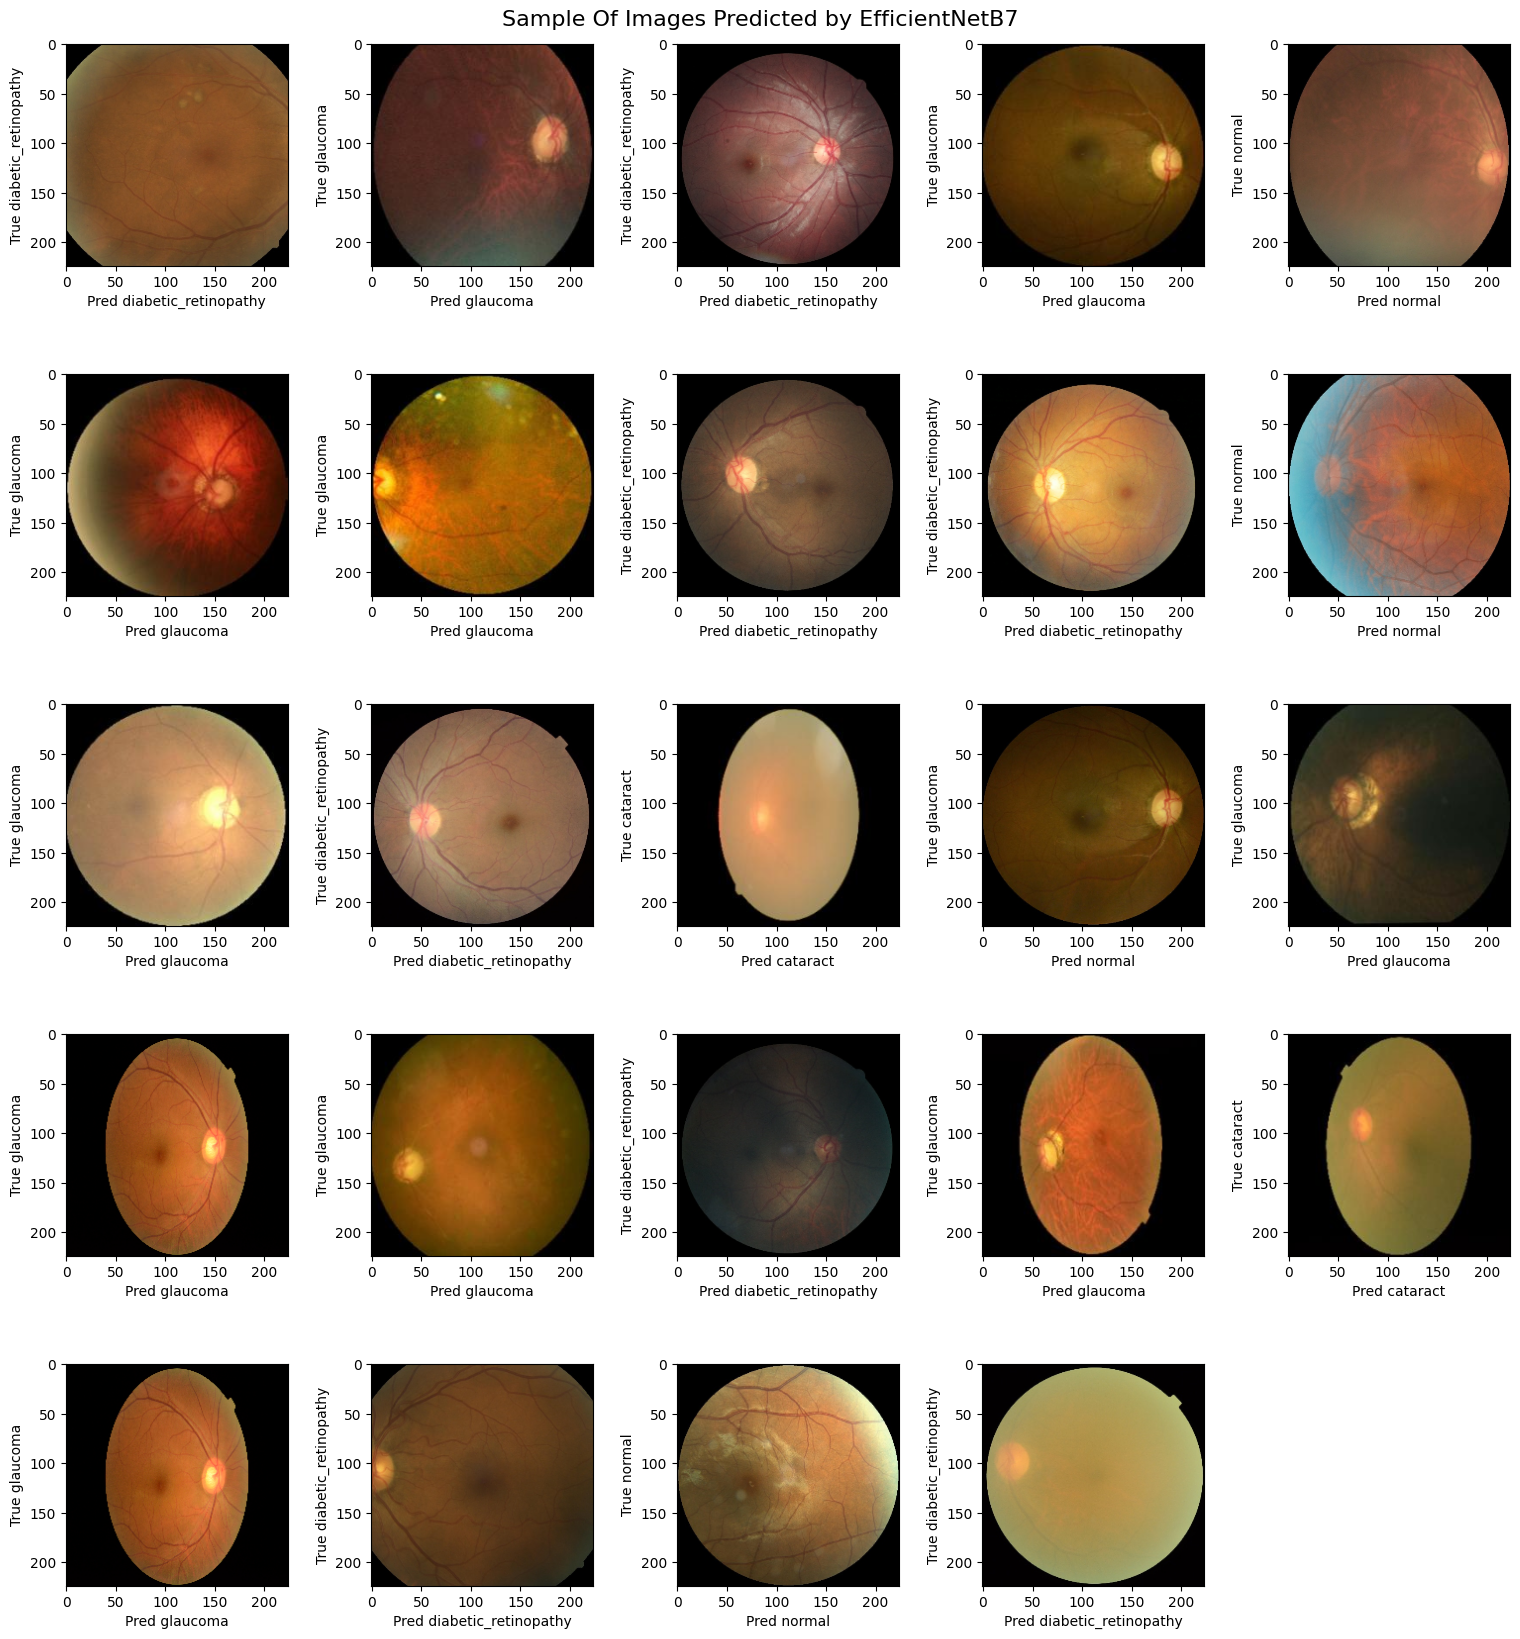

In [50]:
plt.figure(figsize=(15,20))
plt.suptitle(f"Sample Of Images Predicted by EfficientNetB7" , fontsize=16)

for i in range(24):
    plt.subplot(6,5,i+1)
    idx = np.random.choice(np.arange(len(pred_labels)))
    plt.imshow(Test_Images[idx] / 255.0)
    plt.xlabel(f'Pred {Class_Names[pred_labels[idx]]}')
    plt.ylabel(f'True {Class_Names[Test_Labels[idx]]}')
    plt.tight_layout(pad=0 , h_pad=0 , w_pad=2)